# **Module 6: Descriptive and Predictive Modeling**
## **Exercise 1:** K-Nearest Neighbors in depth **(UCI Repository Dataset)**
### **Submitted by:** Jorge de la Torre Garcia (DNI), Lydia Phoebe Amanda Lilius (DNI), Miguel Galán Cisneros (DNI), Vitor Oliveira de Souza (Z0963220P)
### **Date:** 25/02/2024

## **ISOLET Dataset**
### **Description:**
#### The ISOLET dataset is a collection of data used for the task of speech recognition, specifically focusing on the classification of spoken letters of the English alphabet. It represents a challenging and interesting problem in the field of machine learning and pattern recognition due to its perceptual nature and the inherent variability in human speech.
#### **Data Collection:** The dataset was generated by recording 150 subjects who spoke the name of each letter of the alphabet twice. This means there are 52 instances (26 letters x 2 repetitions) per subject.
#### **Speaker Groups:** The subjects were divided into five groups (isolet1 through isolet5), with each group containing 30 speakers. The recordings from the first four groups (isolet1, isolet2, isolet3, isolet4) are combined into a single dataset for training, while the fifth group (isolet5) is used as a separate test set.
#### **Missing Data:** Due to recording issues, three examples were omitted from the dataset, highlighting a real-world challenge in data collection for machine learning.
### **Characteristics:**
#### **Perceptual Task:** The task of recognizing spoken letters involves dealing with noisy data due to the variability in speech among different subjects, accents, pronunciations, etc. This makes it a perceptual task, where the algorithm needs to discern patterns amidst significant potential noise.
### **Applications in Classification Problems:**
#### **Speech Recognition:** The primary application of the ISOLET dataset is in the field of speech recognition, where machine learning models are trained to classify spoken letters accurately. It serves as a practical case for understanding and improving speech recognition technologies.

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
isolet = fetch_ucirepo(id=54) 
  
# data (as pandas dataframes) 
X = isolet.data.features 
y = isolet.data.targets 

In [4]:
# Let's take a look into the data
X.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute608,Attribute609,Attribute610,Attribute611,Attribute612,Attribute613,Attribute614,Attribute615,Attribute616,Attribute617
0,-0.4394,-0.0930,0.1718,0.4620,0.6226,0.4704,0.3578,0.0478,-0.1184,-0.2310,...,0.3334,0.4102,0.2052,0.3846,0.3590,0.5898,0.3334,0.6410,0.5898,-0.4872
1,-0.4348,-0.1198,0.2474,0.4036,0.5026,0.6328,0.4948,0.0338,-0.0520,-0.1302,...,0.2272,0.0000,0.2954,0.2046,0.4772,0.0454,0.2046,0.4318,0.4546,-0.0910
2,-0.2330,0.2124,0.5014,0.5222,-0.3422,-0.5840,-0.7168,-0.6342,-0.8614,-0.8318,...,0.0952,-0.1112,-0.0476,-0.1746,0.0318,-0.0476,0.1112,0.2540,0.1588,-0.4762
3,-0.3808,-0.0096,0.2602,0.2554,-0.4290,-0.6746,-0.6868,-0.6650,-0.8410,-0.9614,...,0.0648,-0.0504,-0.0360,-0.1224,0.1366,0.2950,0.0792,-0.0072,0.0936,-0.1510
4,-0.3412,0.0946,0.6082,0.6216,-0.1622,-0.3784,-0.4324,-0.4358,-0.4966,-0.5406,...,0.2812,0.1562,0.3124,0.2500,-0.0938,0.1562,0.3124,0.3124,0.2188,-0.2500


In [8]:
# Let's check the data statistic characteristics
X.describe()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute608,Attribute609,Attribute610,Attribute611,Attribute612,Attribute613,Attribute614,Attribute615,Attribute616,Attribute617
count,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,...,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000,7797.000000
mean,-0.385396,0.141103,0.347384,0.450659,0.324283,0.163589,0.023852,-0.081577,-0.149191,-0.191763,...,0.370768,0.341730,0.311678,0.318904,0.334451,0.299238,0.224122,0.186668,0.081370,-0.281416
std,0.236721,0.320090,0.326658,0.308301,0.461491,0.569970,0.559704,0.535142,0.528714,0.515343,...,0.335582,0.330835,0.328813,0.333747,0.334954,0.334282,0.336135,0.337780,0.332859,0.354418
min,-1.000000,-0.892600,-0.975200,-0.968000,-0.996600,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.609400,-0.803400,-0.775200,-0.830200,-0.711800,-0.770800,-0.810600,-0.780200,-0.802800,-0.962600
25%,-0.546800,-0.099400,0.105400,0.247800,-0.024800,-0.359600,-0.461600,-0.526800,-0.577400,-0.601200,...,0.130400,0.098000,0.071400,0.073600,0.088600,0.049200,-0.017800,-0.057600,-0.154600,-0.546600
50%,-0.414000,0.106400,0.333400,0.453200,0.415800,0.204200,-0.010800,-0.154400,-0.233200,-0.261000,...,0.366200,0.337400,0.294200,0.295000,0.315800,0.280000,0.192400,0.157800,0.045200,-0.329000
75%,-0.241000,0.354600,0.583400,0.668600,0.692400,0.686200,0.492400,0.304400,0.190200,0.120000,...,0.622600,0.588800,0.548800,0.565800,0.581600,0.541200,0.461600,0.410800,0.289800,-0.065600
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.889800


In [27]:
# Check if the data is in fact scaled
import statistics
min_max_values = [[X[column].min(),X[column].max()] for column in X.columns]
print(f"All values of the dataset are between {min(min_max_values[0])} and {max(min_max_values[1])} with a avg std of {statistics.mean(min_max_values[2]):.2f}")

All values of the dataset are between -1.0 and 1.0 with a avg std of 0.01


In [30]:
# Let's analyse the labels
y.columns = ['target']
y.groupby('target').size()

target
1.0     300
2.0     300
3.0     300
4.0     300
5.0     300
6.0     298
7.0     300
8.0     300
9.0     300
10.0    300
11.0    300
12.0    300
13.0    299
14.0    300
15.0    300
16.0    300
17.0    300
18.0    300
19.0    300
20.0    300
21.0    300
22.0    300
23.0    300
24.0    300
25.0    300
26.0    300
dtype: int64

### Data Characteristics Overview
#### **Feature Composition:** The dataset comprises 617 numerical features per sample, indicating a high-dimensional space for our analysis.
#### **Preprocessing Status:** Preliminary analysis suggests these features have already undergone preprocessing. They are uniformly scaled within a range of -1 to 1, with their mean values close to 0. This standardization simplifies further analysis and modeling by providing a common scale without distorting differences in the ranges of values.
#### **Label Diversity:** The dataset labels correspond to spoken numbers ranging from 1 to 26, reflecting a multi-class classification scenario.
#### **Class Balance:** Each class ideally has 300 samples. However, exceptions are noted for numbers 6 and 13, which are missing 2 and 1 samples, respectively. This slight imbalance might not influence classification performance since it represents less than 0.5% in difference.

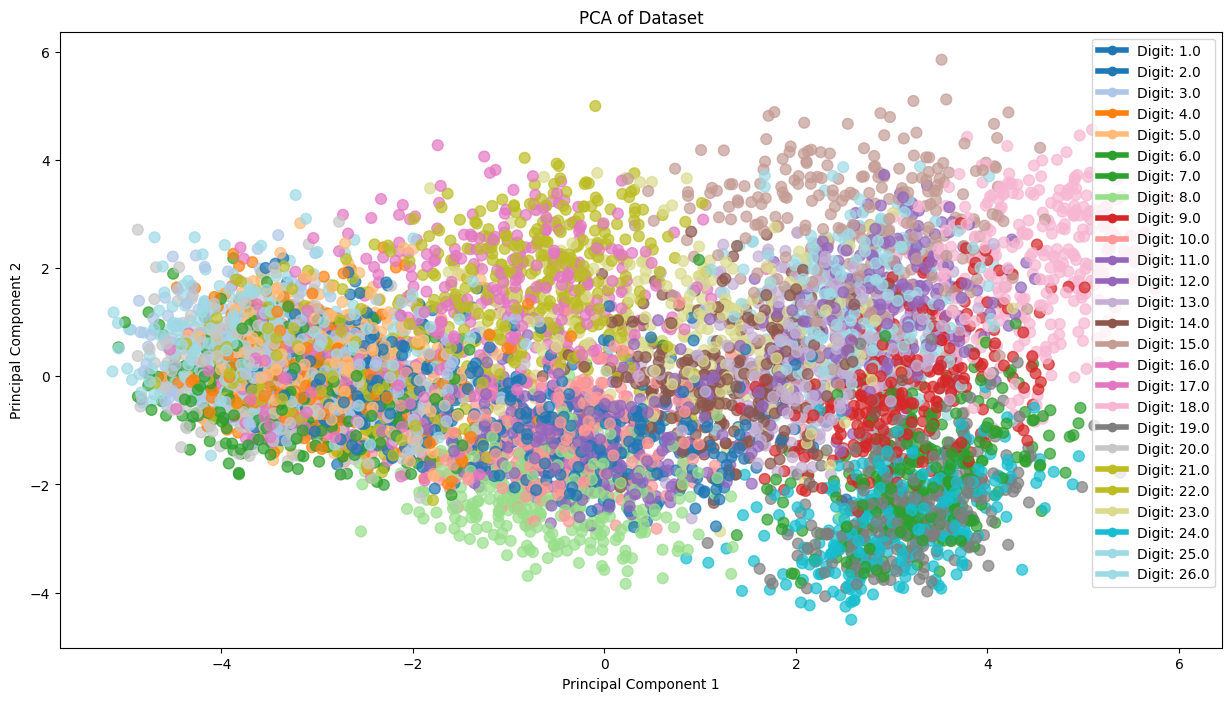

In [39]:
# Visualise the data in 2D using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
import pandas as pd


# Create a function because we'll use it later to check the model's results
def print_pca(data, 
              y, 
              highlight_index=None,
              highlight_points=None,
              text='',
              dim_reducer=PCA(n_components=2),
              scaler=MinMaxScaler()
             ):

    %matplotlib inline
    X_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)
    
    # Perform PCA
    X_pca = dim_reducer.fit_transform(X_scaled)
    X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X_scaled.index)
    X_pca['labels'] = [text+str(target) for target in y['target']]

    # Plot the data
    fig, ax = plt.subplots(figsize=(15, 8))
    scatter = ax.scatter(x=X_pca['PC1'],
               y=X_pca['PC2'],
               c=y['target'],
               cmap='tab20',
               s=60,alpha=0.7)

    # Plot highlighted points based on the index list provided
    if highlight_index is not None:

        print(X_pca.loc[highlight_index].index)
        
        highlighted = ax.scatter(x=X_pca['PC1'].loc[highlight_index],
                                 y=X_pca['PC2'].loc[highlight_index],
                                 c='lime', marker='x', s=60, alpha=1)
        # Annotate highlighted points
        for i in highlight_index:
            ax.annotate(X_pca['labels'].loc[i], 
                        (X_pca['PC1'].loc[i], X_pca['PC2'].loc[i]),
                        textcoords="offset points", # Positioning of the text
                        xytext=(0,10), # Distance from the point to the text
                        ha='center', # Horizontal alignment
                       bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black', alpha=0.5)) # Background box
    
    # Highlight additional points specified directly that are not in the main dataset
    if highlight_points is not None:
        
        # Scale the highlight_points with the same scaled
        highlight_points_scaled = pd.DataFrame(scaler.transform(highlight_points), columns=highlight_points.columns, index=highlight_points.index)
        # Transform using PCA using the same pca transformer
        highlight_points_pca = dim_reducer.transform(highlight_points_scaled)
        
        # Plot the highlighted points
        for point in highlight_points_pca:
            ax.scatter(point[0], point[1], c='gold', edgecolor='black', marker='o', s=60, alpha=1)

    # Custom legend for classes
    classes = list(set(y['target']))
    class_labels = ['Digit: ' + str(cls) for cls in classes]
    colors = [scatter.cmap(scatter.norm(cls)) for cls in classes]
    custom_lines = [Line2D([0], [0], color=colors[i], lw=4, marker='o') for i in range(len(classes))]
    ax.legend(custom_lines, class_labels)
        
    # Set titles and labels
    ax.set_title('PCA of Dataset')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')

print_pca(X,y)

In [40]:
def print_pca_3d(data,y):
    # Now visualize the data in 3d
    %matplotlib qt

    # Scale data
    scaler = MinMaxScaler()
    X_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    # Perform PCA
    pca = PCA(n_components=3)
    X_pca = pca.fit_transform(X_scaled)
    X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2','PC3'])
    X_pca['label'] = ['malignant' if target == 0 else 'benign' for target in y['target']]
    
    # Plot the data
    fig, ax = plt.subplots(figsize=(15, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca['PC1'],
               X_pca['PC2'],
               X_pca['PC3'],
               c=y['target'],
               cmap='tab20',
               s=60,alpha=0.5)

print_pca_3d(X,y)

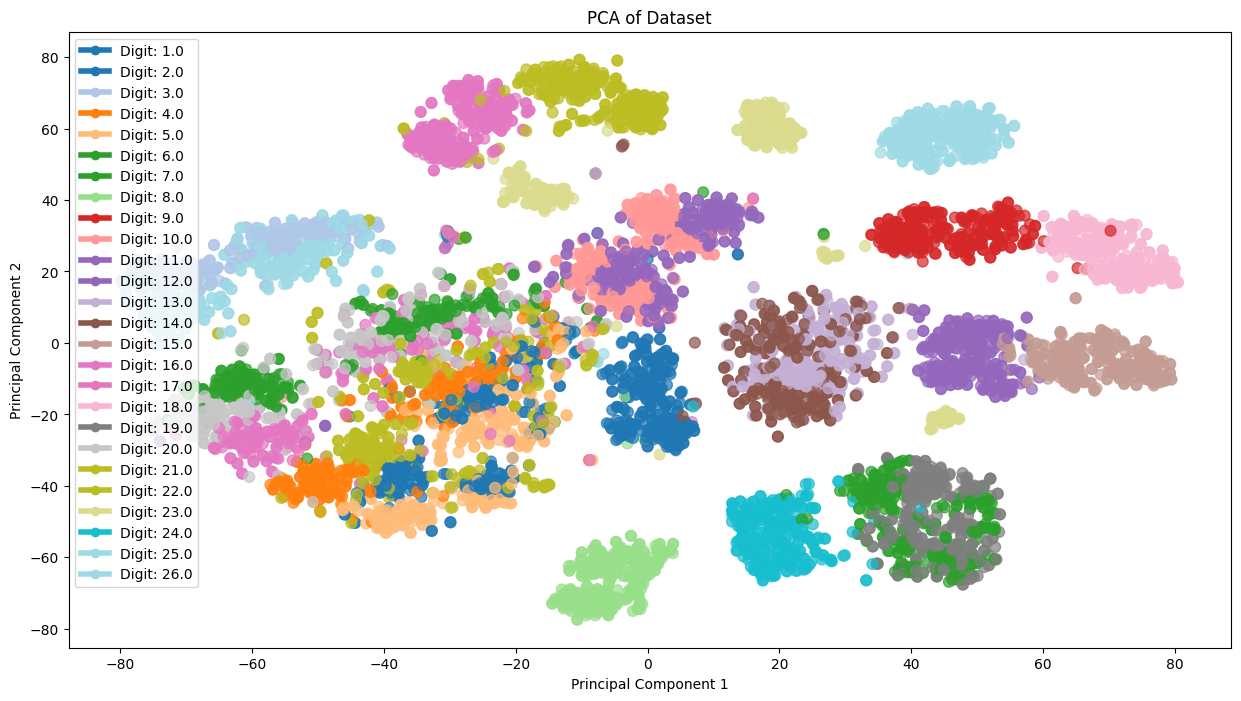

In [41]:
# PCA seems to strugle in separate the dataset, let's try using TSNE
from sklearn.manifold import TSNE
print_pca(X,y,dim_reducer=TSNE(n_components=2))

### **Analyzing Data Distributions in 2D and 3D Projections**
#### **Complexity in Separation:** The overlapping of data points across different classes or clusters in these projections indicates that simple separability is unlikely. 

In [42]:
from sklearn.model_selection import StratifiedShuffleSplit

# Now we create a splitter to split the data considering the classes
# If we simply split the data randomly, the unbalanced classes could be splitted unevenly in train and test
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X, y):
    Xtrain, ytrain = X.iloc[train_index], y.iloc[train_index]
    Xtest, ytest = X.iloc[test_index], y.iloc[test_index]

In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, cohen_kappa_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from datetime import datetime

# Even though we saw the data is already scaled, we will keep the MinMaxScaler in our pipeline
estimator = Pipeline([('Scaler',MinMaxScaler()),('KNN',KNeighborsClassifier())])

param_grid = {
    "KNN__n_neighbors": [3, 5, 7, 9, 11],
    "KNN__p": [1, 2, 3, 4, 5, 7],
    "KNN__weights": ["uniform", "distance"]
}

cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

gscv = GridSearchCV(
    estimator=estimator, param_grid=param_grid, scoring="accuracy", cv=cv_stratified, verbose=1
)

start_time = datetime.now()
gscv.fit(Xtrain, ytrain.squeeze())
total_time = datetime.now() - start_time

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


In [58]:
# Now let's check what was considered the best set of parameters:
gscv.best_params_

{'KNN__metric': 'minkowski',
 'KNN__n_neighbors': 9,
 'KNN__p': 2,
 'KNN__weights': 'distance'}

Total Time: 	3:19:34.244152 seconds
Avg acc (CV):	0.9104
Acc (Test): 	0.9122
Kappa (Test): 	0.9087
F1 (Test): 	0.9124
AUC: 		0.9956


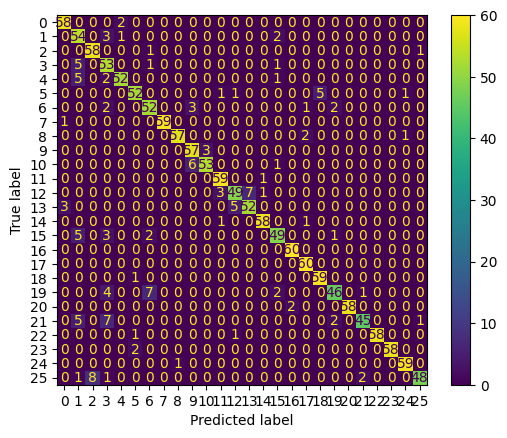

<Figure size 1000x1000 with 0 Axes>

In [55]:
def evaluate_model(predictor):
    # Evaluate the model's performance on the test dataset, focusing on metrics such as accuracy, F1 score, ROC AUC, and the confusion matrix.
    
    # Reporting computational time for model training and grid search
    print(f'Total Time: \t{total_time} seconds')
    
    # Displaying the average accuracy obtained from cross-validation
    print(f"Avg acc (CV):\t{predictor.best_score_:.4f}")
    
    # Fitting the best model found via grid search to the training data
    best_estimator = predictor.best_estimator_
    best_estimator.fit(Xtrain, ytrain['target'])
    
    # Predicting class labels for the test set
    ypred = best_estimator.predict(Xtest)
    
    # Obtaining probability estimates for the test set (used for ROC AUC calculation)
    yprob = best_estimator.predict_proba(Xtest) # Extracting probabilities for the positive class
    
    # Computing and displaying accuracy , cohen_kappa_score and F1 score for the test set
    print(f'Acc (Test): \t{accuracy_score(ytest["target"], ypred):.4f}')
    print(f'Kappa (Test): \t{cohen_kappa_score(ytest["target"], ypred):.4f}')
    print(f'F1 (Test): \t{f1_score(ytest["target"], ypred, average="macro"):.4f}')
    
    # Calculating and printing the ROC AUC score
    roc_auc = roc_auc_score(ytest, yprob, multi_class='ovr', average='macro')
    print(f'AUC: \t\t{roc_auc:.4f}')
    
    # Generating and displaying the confusion matrix
    cm = confusion_matrix(ytest["target"], ypred)
    display = ConfusionMatrixDisplay(cm)
    display.plot()
    plt.figure(figsize=(10, 10))
    plt.show()

evaluate_model(gscv)

Index([1607, 5619, 7536,  319, 1269,  874, 6179, 6201, 3006, 7094,
       ...
       2612, 1342, 3931, 1279,  356, 1923, 1568, 5021, 6137, 1638],
      dtype='int64', length=137)


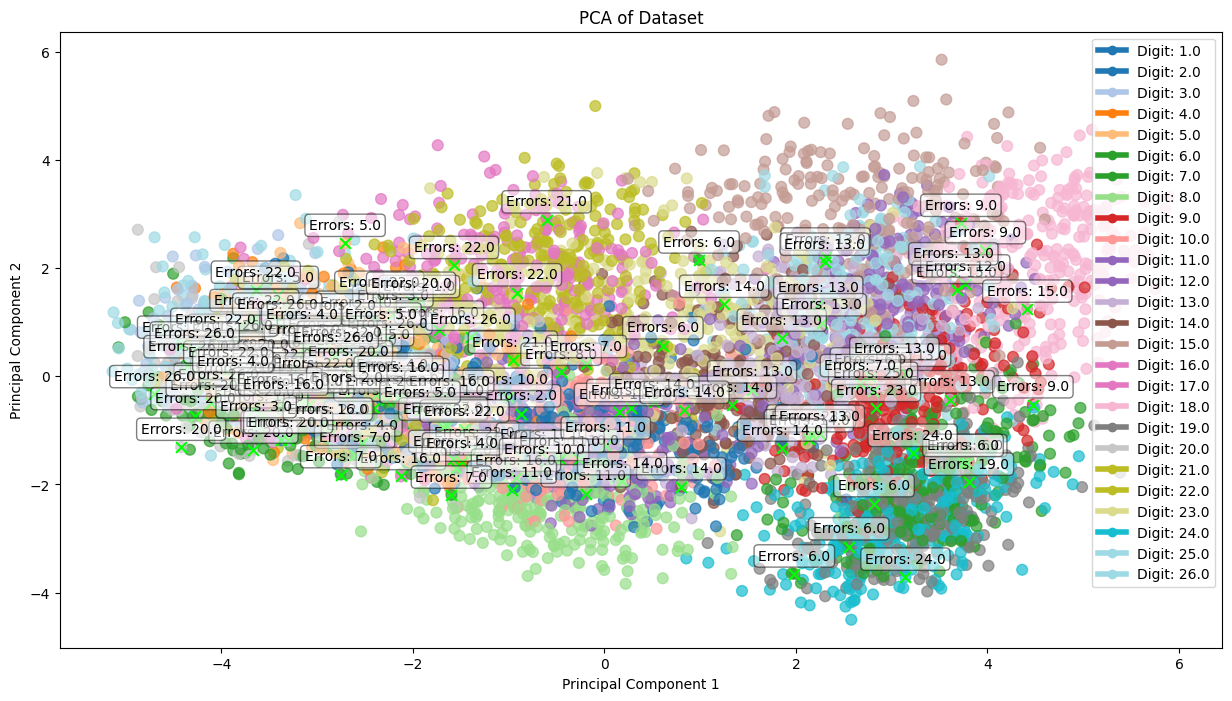

In [57]:
# Let's check graphcally which examples couldn't correctly classified by our model
# Fitting the best model found via grid search to the training data
best_estimator = gscv.best_estimator_
best_estimator.fit(Xtrain, ytrain['target'])

# Predicting class labels for the test set
ypred = best_estimator.predict(Xtest)
errors = ytest['target'][ytest['target'] != ypred]
print_pca(X,y,highlight_index=errors.index,text='Errors: ')

### Lets try to improve these results
#### Feature selection:

In [62]:
from sklearn.feature_selection import SelectKBest, chi2

scaler = MinMaxScaler()
Xtrain_scaled = pd.DataFrame(scaler.fit_transform(Xtrain),columns=Xtrain.columns)
Xtest_scaled = pd.DataFrame(scaler.transform(Xtest),columns=Xtest.columns)

# Feature selection
selector = SelectKBest(score_func=chi2, k=100)  # Example using chi-squared test
Xtrain_selected = selector.fit_transform(Xtrain_scaled, ytrain)
Xtest_selected = selector.transform(Xtest_scaled)

Acc (Test): 	0.8244
Kappa (Test): 	0.8173
F1 (Test): 	0.8264
AUC: 		0.9825


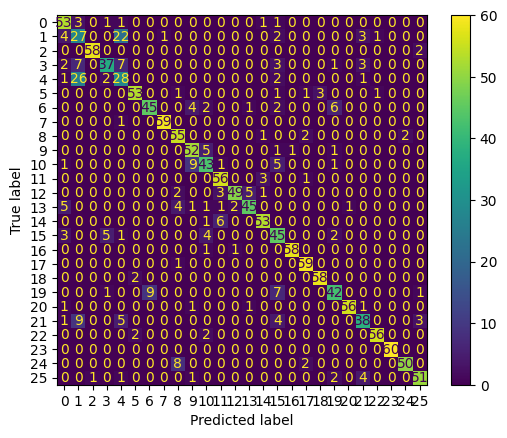

<Figure size 1000x1000 with 0 Axes>

In [66]:
best_estimator = gscv.best_estimator_
best_estimator.fit(Xtrain_selected, ytrain['target'])

# Predicting class labels for the test set
ypred = best_estimator.predict(Xtest_selected)

# Obtaining probability estimates for the test set (used for ROC AUC calculation)
yprob = best_estimator.predict_proba(Xtest_selected) # Extracting probabilities for the positive class

# Computing and displaying accuracy , cohen_kappa_score and F1 score for the test set
print(f'Acc (Test): \t{accuracy_score(ytest["target"], ypred):.4f}')
print(f'Kappa (Test): \t{cohen_kappa_score(ytest["target"], ypred):.4f}')
print(f'F1 (Test): \t{f1_score(ytest["target"], ypred, average="macro"):.4f}')

# Calculating and printing the ROC AUC score
roc_auc = roc_auc_score(ytest, yprob, multi_class='ovr', average='macro')
print(f'AUC: \t\t{roc_auc:.4f}')

# Generating and displaying the confusion matrix
cm = confusion_matrix(ytest["target"], ypred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.figure(figsize=(10, 10))
plt.show()

### Analysis
#### **Accuracy, Kappa, and F1 Score:** There's a noticeable drop in all these metrics after feature selection. This suggests that the reduced feature set might be missing some important predictors that contribute to the model's ability to accurately classify observations. Despite the simplification and potential gains in model interpretability and efficiency, the cost comes in the form of reduced model performance.
#### **AUC:** Even after feature selection, the AUC remains quite high at 98.25%, indicating that the model still maintains a good measure of separability. However, the slight decrease from 99.56% suggests that the model's ability to distinguish between classes has been affected, albeit slightly, by the reduction in features.
#### **Feature Selection Method:** The choice of SelectKBest with the chi-squared test is a common approach for categorical data. However, the choice of k=100 features to keep might be too aggressive or not optimal for your specific dataset. It might be worth experimenting with different values of k or trying other feature selection methods (e.g., Recursive Feature Elimination, feature importance from tree-based models) to find a better balance between model complexity and performance.
#### **Model Complexity:** Simplifying the model can help with generalization and reduce the risk of overfitting, but as seen here, too much simplification might strip the model of its predictive power. Finding the right number of features is key.
#### **Cross validation:** The cross validation method was performed with the original data and the best configuration may not be the same to fit the data after the feature selection part. In order to address this problem, we may include the feature selection step into the pipeline so we can test different values for k in the same time we test different configurations for the model.

In [70]:
from sklearn.feature_selection import f_classif, mutual_info_classif

estimator = Pipeline([('Scaler',MinMaxScaler()),('FS',SelectKBest()),('KNN',KNeighborsClassifier())])

param_grid = {
    "FS__k":[20, 50],
    "FS__score_func": [chi2, f_classif, mutual_info_classif],
    "KNN__n_neighbors": [5, 7, 9, 11],
    "KNN__p": [2, 3, 4, 5, 7],
    "KNN__weights": ["uniform", "distance"]
}

cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

gscv = GridSearchCV(
    estimator=estimator, param_grid=param_grid, scoring="accuracy", cv=cv_stratified, verbose=1
)

start_time = datetime.now()
gscv.fit(Xtrain, ytrain.squeeze())
total_time = datetime.now() - start_time

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [73]:
# Now let's check what was considered the best set of parameters:
gscv.best_params_

{'FS__k': 50,
 'FS__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'KNN__n_neighbors': 7,
 'KNN__p': 2,
 'KNN__weights': 'distance'}

Total Time: 	4:02:59.959470 seconds
Avg acc (CV):	0.7494
Acc (Test): 	0.7327
Kappa (Test): 	0.7220
F1 (Test): 	0.7318
AUC: 		0.9608


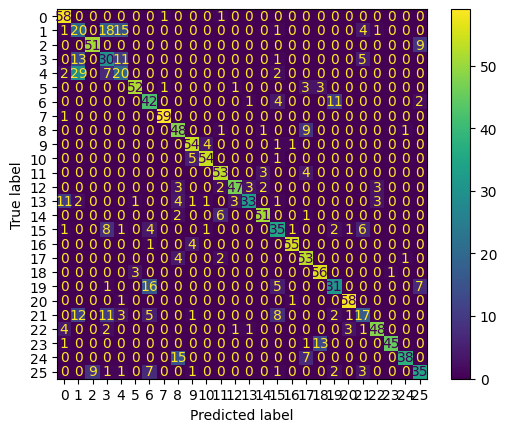

<Figure size 1000x1000 with 0 Axes>

In [72]:
evaluate_model(gscv)

### Conclusion
#### **Feature Selection Sensitivity:** The choice and parameterization of feature selection methods (e.g., number of features to select) can drastically influence the model's ability to learn from the data. Too few features might have led to information loss, while the selected features might not have been the most predictive of the target variable.
#### **Model Specificity:** The K-Neighbors Classifier, while robust for certain types of data, might not have been the most suitable for the dataset's complexity or nature. This approach relies heavily on the assumption that similar instances lead to similar outcomes, which might not hold if the dataset contains complex, non-linear relationships that a distance-based method struggles to capture.
#### **Parameter Tuning and Model Complexity:** The grid search across multiple parameters introduces high variability, and while it aims to find the best combination, it also risks settling on a local optimum that does not generalize well outside the training data. Furthermore, increasing the model's complexity through extensive parameter tuning does not always guarantee better performance, especially if the model starts to overfit the training data.
#### **Computational Resource Allocation:** The substantial increase in total computational time for the second approach indicates a more complex search space and a possibly more computationally intensive feature selection process. However, the added computational burden did not translate to better model performance, suggesting inefficiencies in the selected approach.